In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

# Problem 1:

In [2]:
def isEven(a):
    #simple function to check for even or odd A
    if a%2==0:
        return True
    else:
        return False

def Binding_Energy(A,Z):
    a1 = 15.8 #values of a1, a2, etc. taken from homework prompt
    a2 = 18.3
    a3 = 0.714
    a4 = 23.2
    #The assignment didn't have guidelines for a5, so I'm using the
    #    same values given for a similar problem from PHYS 60323,
    #    Advanced Analysis and Modeling with Dr. Frinchaboy.
    if not isEven(A):
        a5=0
    elif isEven(Z):
        a5=12.0
    else:
        a5=-12.0
    return(a1*A-a2*A**(2/3)-a3*(Z**2)/(A**(1/3))-a4*((A-2*Z)**2)/A-a5/(A**(1/2)))

## Part a) Finding the Binding Energy for A = 58 and Z = 28

In [3]:
print(Binding_Energy(58,28)," MeV")

494.4106662338041  MeV


## Part b) Printing B/A

In [4]:
def Binding_Energy_Per_Nucleon(A,Z):
    #we define a new function that calls the original function.
    #this new function returns the binding energy divided by the mass number
    return((Binding_Energy(A,Z))/A)

In [5]:
print(Binding_Energy_Per_Nucleon(58,28)," MeV/Nucleon")

8.524321831617312  MeV/Nucleon


## Part c) Most Stable Mass number for a given Atomic number

In [6]:
def Most_Stable(Z):
    highest_energy = -np.inf
    #we iterate through A=Z to A=3Z, as per the instructions
    for A in range(Z,(3*Z+1)):
        #we call our Binding energy per nucleon from the previous function
        current_energy = Binding_Energy_Per_Nucleon(A,Z)
        
        #and compare to the current highest energy
        if current_energy>highest_energy:
            #if true, we store the current energy and mass number
            highest_energy = current_energy
            most_stable_A = A
    return(most_stable_A,Binding_Energy_Per_Nucleon(most_stable_A,Z))

def Part_c_Presentation(Z):
    #this is just to answer the problem prompt...
    a, b_a = Most_Stable(Z)
    print("For a given atomic number Z=",str(Z),", the most stable mass number is A=",str(a)," with a binding energy of B/A=",str(b_a)," MeV per nucleon.")

In [7]:
Part_c_Presentation(21)

For a given atomic number Z= 21 , the most stable mass number is A= 46  with a binding energy of B/A= 8.64524515417385  MeV per nucleon.


## Part d) Maximum Binding Energy for Z = 1 to Z = 100

In [8]:
def Max_Binding_Energy(zmin=1,zmax=100):
    #initializing lists for storing A's, Z's, and B/A's
    z_list = []
    a_list = []
    b_a_list = []
    #iterates through the min Z to the max Z
    for Z in range(zmin,(zmax+1)):
        #building the lists, calling the function from part C
        z_list.append(Z)
        a_list.append(Most_Stable(Z)[0])
        b_a_list.append(Most_Stable(Z)[1])
    return(z_list,b_a_list)

def Part_d_Presentation(zmin=1,zmax=100):
    Zs, BAs = Max_Binding_Energy(zmin=zmin,zmax=zmax)
    print("Z:          Binding Energy Per Nucleon:")
    print()
    for i in range(len(Zs)):
        print(Zs[i],"        ",BAs[i])

In [9]:
print("Z with highest binding Energy per Nucleon:")
((Max_Binding_Energy()[1]).index(max(Max_Binding_Energy()[1])))+1

Z with highest binding Energy per Nucleon:


27

In [10]:
Part_d_Presentation()

Z:          Binding Energy Per Nucleon:

1          5.234569973833937
2          3.836055291727471
3          5.956224457871426
4          6.105626049846103
5          6.8568421469089404
6          7.039010911331331
7          7.494877480930497
8          7.557256623426572
9          7.895075047676241
10          7.8820075921951815
11          8.148731677524701
12          8.14424691358025
13          8.316935086899244
14          8.320211813171491
15          8.432088603495778
16          8.438501445309871
17          8.535766876460082
18          8.517283540595392
19          8.60350258662576
20          8.584312327756763
21          8.64524515417385
22          8.630187635956576
23          8.674231215192751
24          8.655896848847506
25          8.696209540295092
26          8.6712771266563
27          8.703395365721606
28          8.681476079276997
29          8.701892332826546
30          8.679661743547898
31          8.698674127089637
32          8.672234613569024
33         

## Part e) Plotting the results

Text(0.5, 1.0, 'Largest Binding Energy per Nucleon vs. Atomic Number')

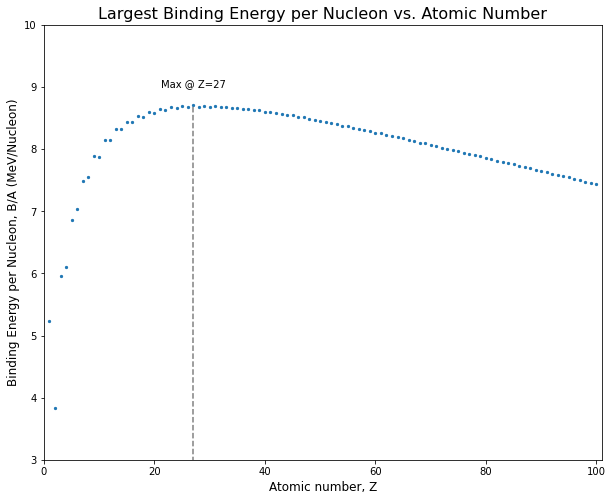

In [11]:
#get x and y data for the plot
prob1x, prob1y = Max_Binding_Energy()

plt.figure(figsize=(10,8))
plt.scatter(prob1x,prob1y,s=5)
plt.xlim(0,101)
plt.ylim(3,10)
plt.text(27,9,"Max @ Z=27",horizontalalignment="center")
plt.vlines(27,0,8.7,color="grey",linestyle="dashed")
plt.xlabel("Atomic number, Z",fontsize=12)
plt.ylabel("Binding Energy per Nucleon, B/A (MeV/Nucleon)",fontsize=12)
plt.title("Largest Binding Energy per Nucleon vs. Atomic Number",fontsize=16)

# Problem 2:

## Part a) Quadratic Formula

In [12]:
def quadratic(a,b,c):
    return(((-b+np.sqrt(b**2-4*a*c))/(2*a)),((-b-np.sqrt(b**2 - 4*a*c))/(2*a)))

In [13]:
print(quadratic(0.001,1000,0.001))

(-9.999894245993346e-07, -999999.999999)


## Part b) A different form of the Quadratic Formula

In [14]:
def quadratic_v2(a,b,c):
    return(((2*c)/(-b-np.sqrt(b**2 - 4*a*c))),(((2*c)/(-b+np.sqrt(b**2 - 4*a*c)))))

In [15]:
print(quadratic_v2(0.001,1000,0.001))

(-1.000000000001e-06, -1000010.5755125057)


The two different definitions of the quadratic formula give slightly different results. It would appear that in each case the method using the '-' operator instead of the '+' gives the result closest to the true root. This is 

## Part c) The best solutions

In [16]:
def quadratic_best(a,b,c):
    return(((-b-np.sqrt(b**2 - 4*a*c))/(2*a)),((2*c)/(-b-np.sqrt(b**2 - 4*a*c))))

In [17]:
print(quadratic_best(0.001,1000,0.001))

(-999999.999999, -1.000000000001e-06)


# Problem 3:

In [18]:
class planet(object):
    def __init__(self,size,radius,period,angle,color):
        #initialize planet object with properties of size, orbital radius, orbital period, and position
        #    position of the objects is parameterized in polar coords by the orbital radius (const) and angle.
        self.size = size
        self.radius = radius
        self.period = period
        self.angle = angle
        self.color = color
    
    def propagate(self,timespeed):
        #only factor here is how fast time will be scaled
        #planets are propagated according to their orbital period by adjusting their angle.
        self.angle = self.angle + ((2*np.pi)/self.period)*timespeed



In [19]:
def plot_planet(planet):
    #we get x and y coordinates for plotting from the planet's radius and angle properties
    x = planet.radius * np.cos(planet.angle)
    y = planet.radius * np.sin(planet.angle)
    
    plt.scatter(x,y,c=planet.color,s=planet.size)
#     plt.xlim(-planet.radius-1,planet.radius+1)
#     plt.ylim(-planet.radius-1,planet.radius+1)
    

def run_simulation(c1,c2):
    #initializing the celestial objects for the simulation
    #    data from page 119 of Computational Physics
    Sun = planet(695500*c2,0,1,0,'gold')
    Mercury = planet(2440*c2,57.9*1e6,88.0,0,'grey')
    Venus = planet(6052*c2,108.2*1e6,224.7,0,'orange')
    Earth = planet(6371*c2,149.6*1e6,365.3,0,'b')
    Mars = planet(3386*c2,227.9*1e6,687.0,0,'r')
    Jupiter = planet(69173*c2,778.5*1e6,4331.6,0,'bisque')
    Saturn = planet(57316*c2,1433.4*1e6,10759.2,0,'y')
    
    planets_list = [] #initializing a list to contain all the planets
    planets_list.append(Sun)
    planets_list.append(Mercury)
    planets_list.append(Venus)
    planets_list.append(Earth)
    planets_list.append(Mars)
    planets_list.append(Jupiter)
    planets_list.append(Saturn)
    
    #NOTE: THIS PROGRAM DOES NOT YET CORRECTLY 'ANIMATE' THE SOLUTION
    plt.figure(figsize=(10,10))
    for t in range(0,100):
        for i in planets_list:
            plot_planet(i)
            plt.xlim(-Saturn.radius,Saturn.radius)
            plt.ylim(-Saturn.radius,Saturn.radius)
            i.propagate(c1)
        #time.sleep(0.5)

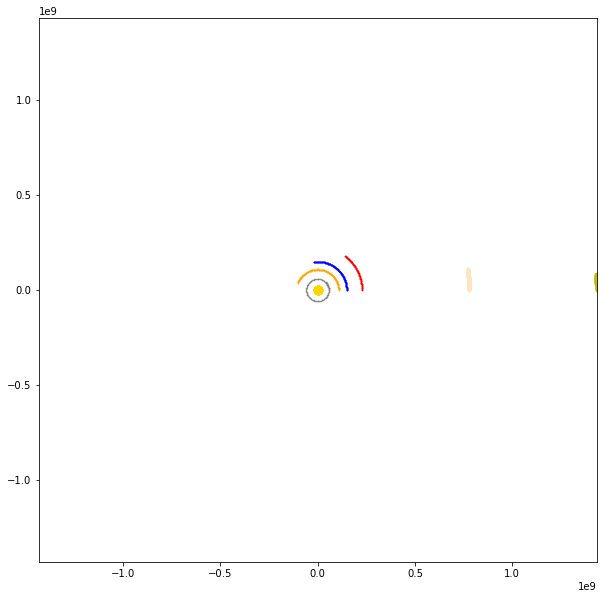

In [20]:

run_simulation(1,0.0001)